<a href="https://colab.research.google.com/github/aryalekshmiI/Data-Science-and-Machine-Learning/blob/main/AryaLekshmi_Customer_analysis_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Analysis**






# **GOALS**

The objective of this projectis to build a model, using historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
1.	Highlight any trend in data, deep insight, novel steps that you take
2.	Highlight next steps and improvements.
3.	Apply classification and clustering machine learning algorithms and evaluate it.  
Customer analysis helps to improve its products based on its target customers from different types of customer segments.

# **Importing libraries**

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# **Load Data**

In [2]:

url = "https://raw.githubusercontent.com/aryalekshmiI/Data-Science-and-Machine-Learning/main/customer_train.csv"
df = pd.read_csv(url)
#print(df.head())

In [3]:
df.head()


,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df_shape = df.shape

**It represents the dimensions of dataframe and it contains two value.First value is rows value and second one is columns value **

In [5]:
print(df_shape)

(1680, 31)


**Here rows value is 1680 and columns value is 3**1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i



* Here we have 3 object type datas and others are numerical.




In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

# **Data Cleaning**

In [8]:
# Finding the number of unique values present in each column

df.nunique()

Unnamed: 0.1           1680
Unnamed: 0             1680
ID                     1680
Year_Birth               58
Education                 5
Marital_Status            6
Income                 1512
Kidhome                   3
Teenhome                  3
Dt_Customer             620
Recency                 100
MntCoke                 680
MntFruits               151
MntMeatProducts         485
MntFishProducts         171
MntSweetProducts        167
MntGoldProds            195
NumDealsPurchases        15
NumWebPurchases          13
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        15
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64



In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows so  they are not going to contribute anything in the model building. So we can drop them.




In [9]:
# Null check
null_values = df.isnull().sum()
null_values

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


*  Income column have some missing values, so we will have to fill it by either mean or median


<Axes: >

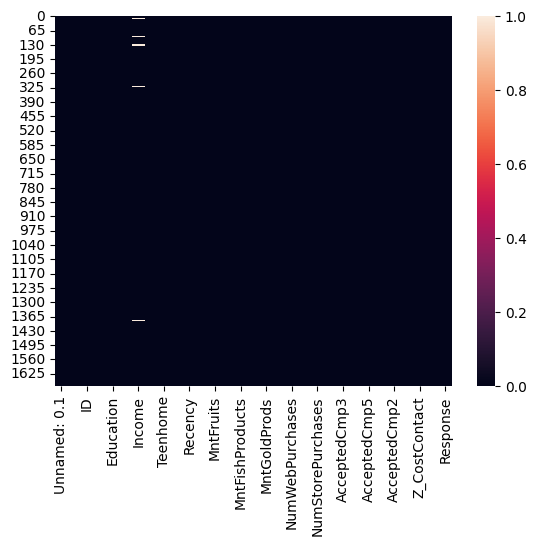

In [10]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())



* Heatmap is graphical representation of data where values are reprented by colors.  
*Useful for identifying patterns,correlations,especially in dealing with numerical data.




In [11]:
#check for NaN values in each column
nan_values = df.isna().any()

In [12]:
#print columns with NaN values

columns_with_nan = nan_values[nan_values].index.tolist()
print('columns with NaN values',columns_with_nan)

columns with NaN values ['Income']


In [13]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Unnamed: 0.1" , "Unnamed: 0" , "Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,3,6,5,0,0,0,0,0,0,0


# **Correlation and Data Visualization**


* Correlation is commonly used to identify relationships between variables.
* It makes predictions based on one varible with other.
* It selects relevant features for machine learning models
* Correlation doesn't imply causation.





<Axes: >

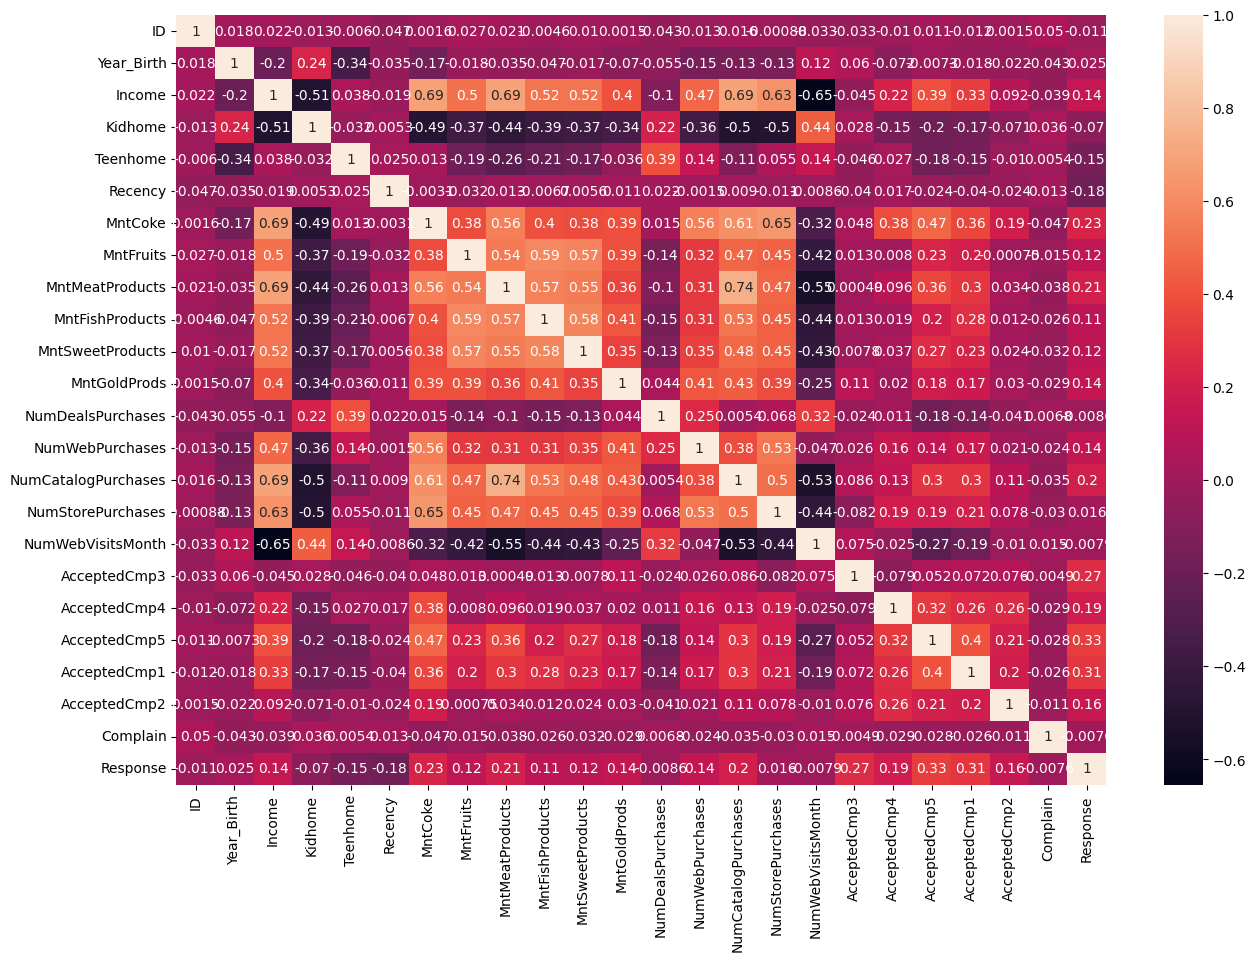

In [14]:
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)


* Can't drop any column on the basis of correlation because no two columns are too much correlated with each other.




In [15]:
# Filling the missing value in the income by mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,3,6,5,0,0,0,0,0,0,0


In [17]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Marital_Status
Menikah        650
Bertunangan    438
Lajang         360
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace(['Menikah', 'Bertunangan'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Lajang', 'Cerai', 'Janda', 'Duda'],'Single')
# Count of different values present in Marital_Status
#Menikah,Bertunangan are grouping as relationship
#Lajang, Cerai, Janda, Duda are grouping as single
df['Marital_Status'].value_counts()

Marital_Status
relationship    1088
Single           592
Name: count, dtype: int64

In [19]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [20]:
# Deleting some column to reduce dimension and complexity of model

col_del = [ "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,S1,Single,58138000.0,04-09-2012,58,0,0,1617000,1,25
1,2174,1954,S1,Single,46344000.0,08-03-2014,38,0,2,27000,0,6
2,4141,1965,S1,relationship,71613000.0,21-08-2013,26,0,0,776000,0,21
3,6182,1984,S1,relationship,26646000.0,10-02-2014,26,0,1,53000,0,8
4,5324,1981,S3,relationship,58293000.0,19-01-2014,94,0,1,422000,0,19


In [21]:
# Adding a column "Age" in the dataframe

df['Age'] = 2024 - df["Year_Birth"]

In [22]:
df['Education'].value_counts()

Education
S1     834
S3     373
S2     279
D3     159
SMA     35
Name: count, dtype: int64

In [23]:
# Changing category into Degree and Non-Degree only

df['Education'] = df['Education'].replace(['S1','S3','S2'],'Degree')
df['Education'] = df['Education'].replace(['D3','SMA'], 'Non-Degree')
#Count different value present in education
#S1,S3,S2 are grouping as degree
#D3,SMA are grouping as Non-degree
df['Education'].value_counts()

Education
Degree        1486
Non-Degree     194
Name: count, dtype: int64

In [24]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['first_day'] = '01-01-2013'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [25]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(1680, 9)

# **Visualization**

In [26]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()


* Based on marital status with expenses,eduction is high in relationship.
* Less in single.



In [27]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()


* relationship is high in marital status with expenses.
* And less in single






In [28]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [29]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [30]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'gridon')
fig.show ()

In [31]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [32]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [33]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.7, template = "gridon")
fig.show ()


* 64.8% customers are in relationship.
* less customers with 35.2% are in single.



In [34]:
fig =  px.pie (df, names = "Education", hole = 0.7, template = "plotly_dark")
fig.show ()


* 88.5% customers have degree level education.
* 11.5% customers have non-degree level education.



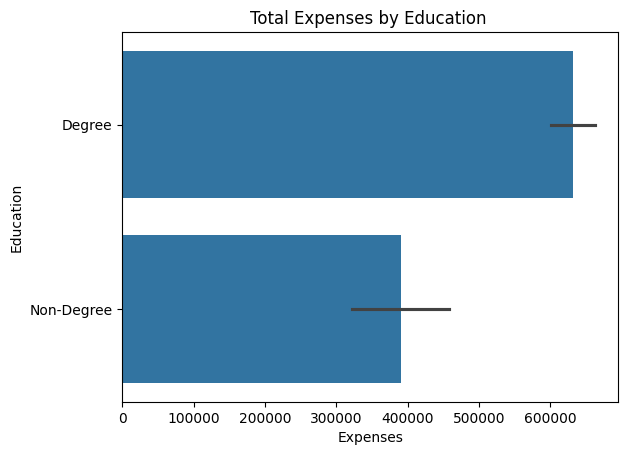

In [35]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expenses by Education ');


* Total expenses by education is high in degree level.
* Total expenses by education is low in non-degree level.



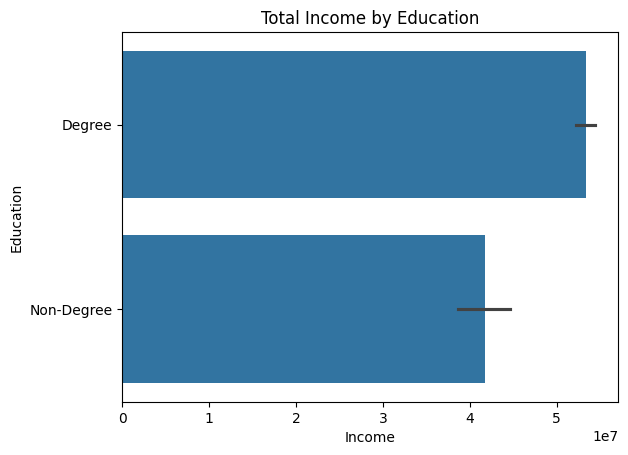

In [36]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income by Education');


* Total income by eduaction is high in degree and low in non-degree.




In [37]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1680.000000
mean,5.201434e+07,0.952381,6.039030e+05,0.433333,14.839881,55.152381,-191.196429
std,2.137345e+07,0.763284,6.017014e+05,0.878074,7.672958,12.027192,201.201805
min,1.730000e+06,0.000000,5.000000e+03,0.000000,0.000000,28.000000,-544.000000
25%,3.579075e+07,0.000000,6.900000e+04,0.000000,8.000000,47.000000,-362.000000
50%,5.144550e+07,1.000000,3.915000e+05,0.000000,15.000000,54.000000,-191.000000
75%,6.789750e+07,1.000000,1.035500e+06,1.000000,21.000000,64.000000,-16.000000
max,1.623970e+08,3.000000,2.525000e+06,5.000000,44.000000,131.000000,155.000000


In [38]:
df_numeric = df.select_dtypes(include=['float64','int64'])


In [39]:
correlation_matrix = df_numeric.corr()

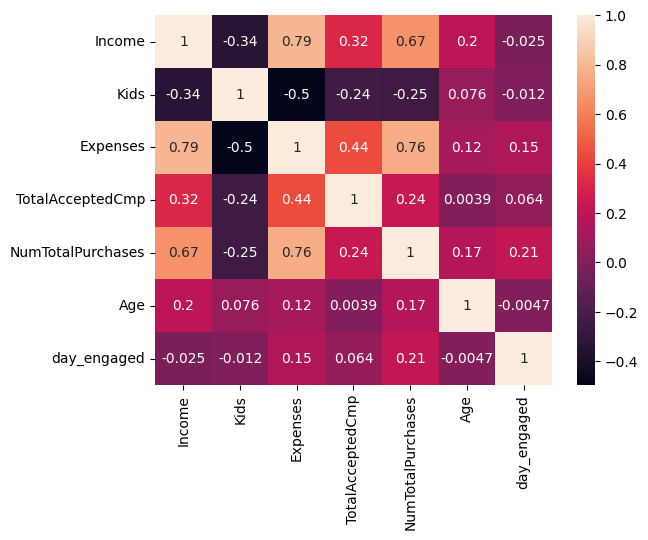

In [40]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [41]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


# **Label Encoding**

In [42]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)


* Label encoding is a technique used to convert categorical datas into numerical formats.



In [43]:
data = df.copy()

# **Standardization**

In [44]:
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)


* Standardization is a pre-processing technique used to rescale features so that they have a mean of 0 and a standard deviation of 1.
*Also known as z-score normalization.



In [45]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.36132,-1.355669,0.286593,-1.248112,1.684222,0.645544,1.324541,0.985363,1.542177
1,-0.36132,-1.355669,-0.265378,1.372923,-0.959072,-0.493651,-1.152426,1.234872,-1.192211
2,-0.36132,0.737643,0.917236,-1.248112,0.286102,-0.493651,0.803074,0.320005,-0.202860
3,-0.36132,0.737643,-1.187263,0.062406,-0.915848,-0.493651,-0.891692,-1.260219,-1.062949
4,-0.36132,0.737643,0.293847,0.062406,-0.302404,-0.493651,0.542341,-1.010710,-0.953573


# **Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

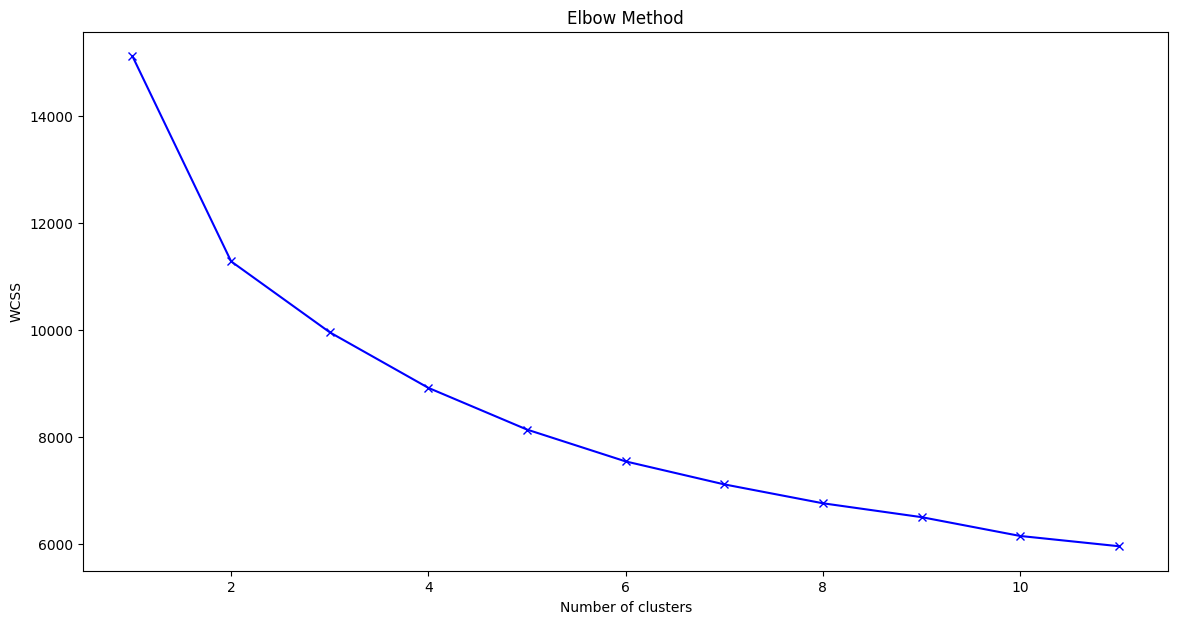

In [46]:
wcss=[]
for i in range (1,12):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=35)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,7))
plt.plot(range(1,12),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The value of K can't be clearly choose from this elbow method.

# **Silhouette Score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

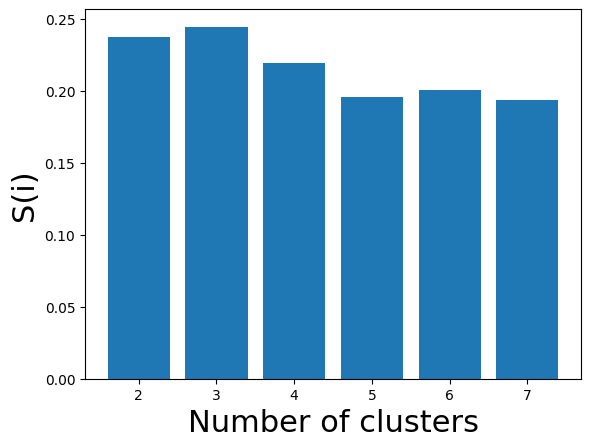

In [47]:
silhouette_scores = []
for i in range(2,8):
    m1=KMeans(n_clusters=i, random_state=35)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,8), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('S(i)', fontsize = 22)
plt.show()


* Used to determine the number of clusters.
* Score closes to 1 indicates that the object is well clustered.  
* Score around 0 indicates overlapping clusters.
* Score close to -1 indicates that the object might be assigned to the wrong cluster,





In [48]:
silhouette_scores

[0.23780379621984335,
 0.2446973440662204,
 0.21918643746453198,
 0.19558838415089094,
 0.20058972950266388,
 0.19404134882060625]

In [49]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


# **Model Building**

In [50]:
# Training a predicting by K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=35).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)

# Appending those cluster value into main dataframe

df['cluster'] = pred + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [51]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138000.0,0,1617000,1,25,67,119,3
1,0,0,46344000.0,2,27000,0,6,70,-431,2
2,0,1,71613000.0,0,776000,0,21,59,-232,3
3,0,1,26646000.0,1,53000,0,8,40,-405,2
4,0,1,58293000.0,1,422000,0,19,43,-383,2


In [52]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.36132,-1.355669,0.286593,-1.248112,1.684222,0.645544,1.324541,0.985363,1.542177
1,-0.36132,-1.355669,-0.265378,1.372923,-0.959072,-0.493651,-1.152426,1.234872,-1.192211
2,-0.36132,0.737643,0.917236,-1.248112,0.286102,-0.493651,0.803074,0.320005,-0.202860
3,-0.36132,0.737643,-1.187263,0.062406,-0.915848,-0.493651,-0.891692,-1.260219,-1.062949
4,-0.36132,0.737643,0.293847,0.062406,-0.302404,-0.493651,0.542341,-1.010710,-0.953573


In [53]:
df['Education'].value_counts()

Education
0    1486
1     194
Name: count, dtype: int64



*   0 means Degree and 1 means Non-Degree
*   There are very less customer from Non-Degree background



# **Clustering**

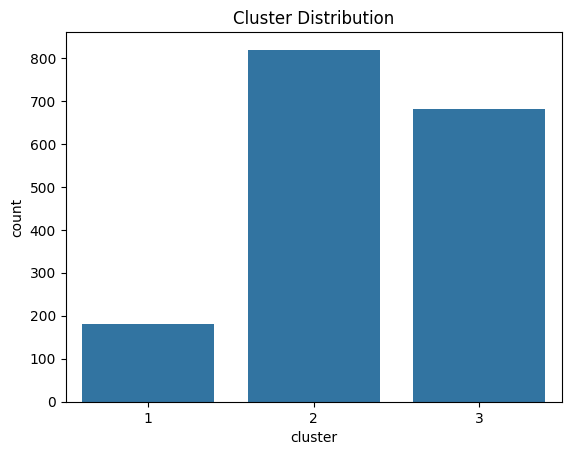

In [54]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Cluster Distribution")
plt.show()

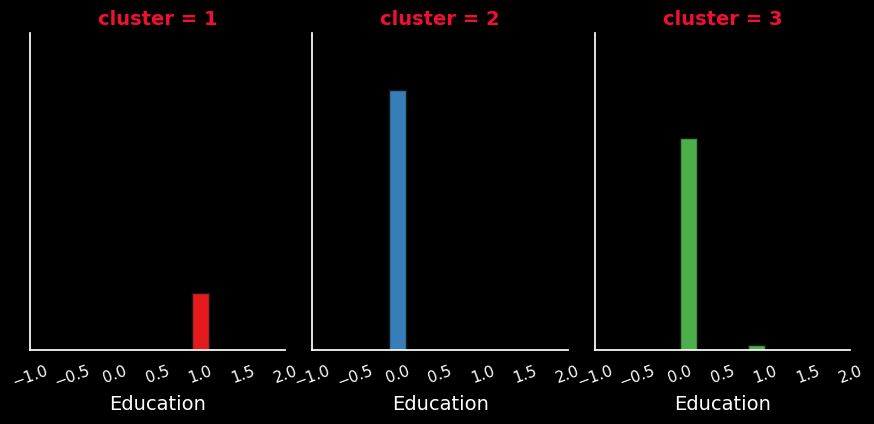

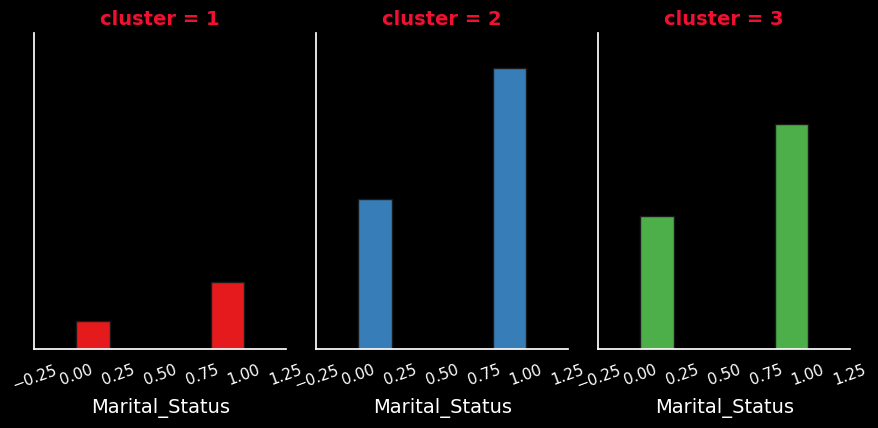

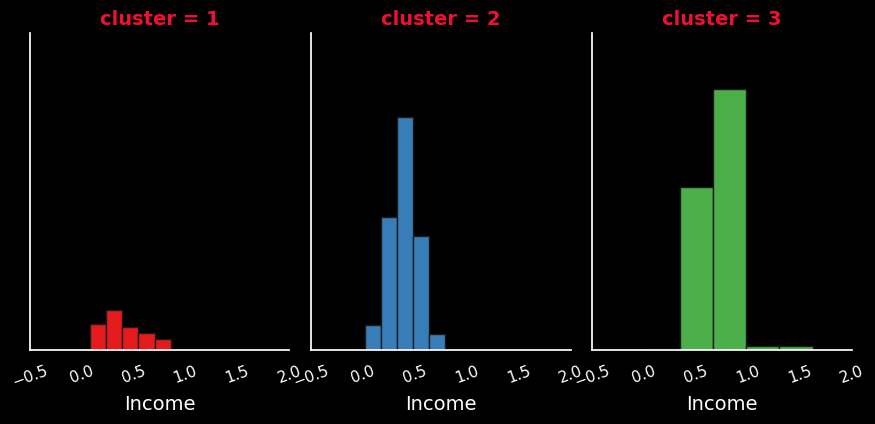

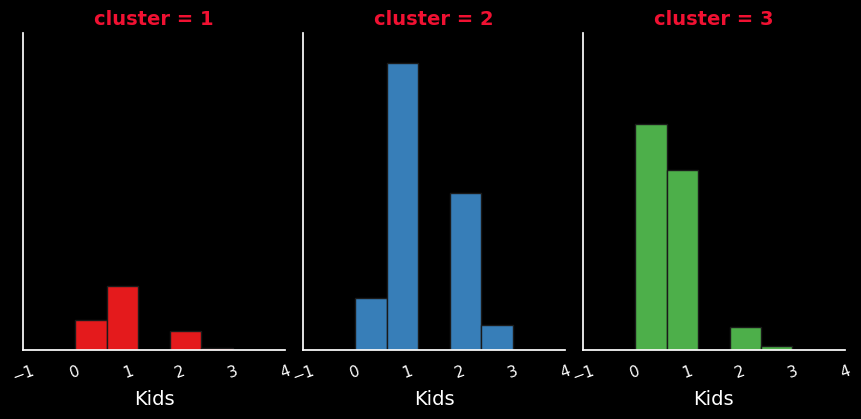

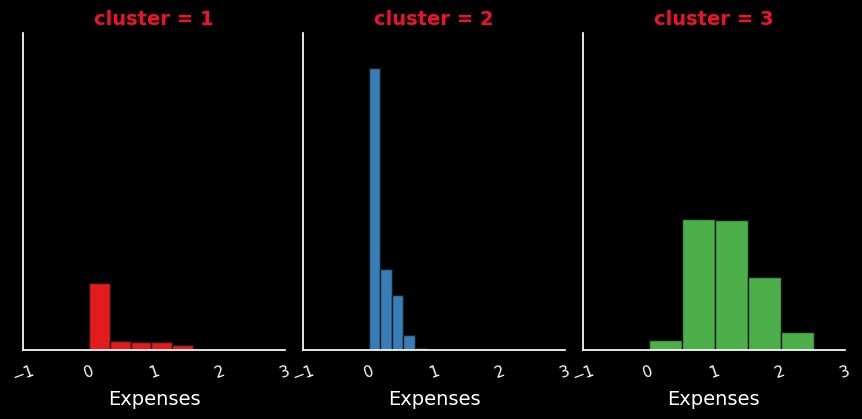

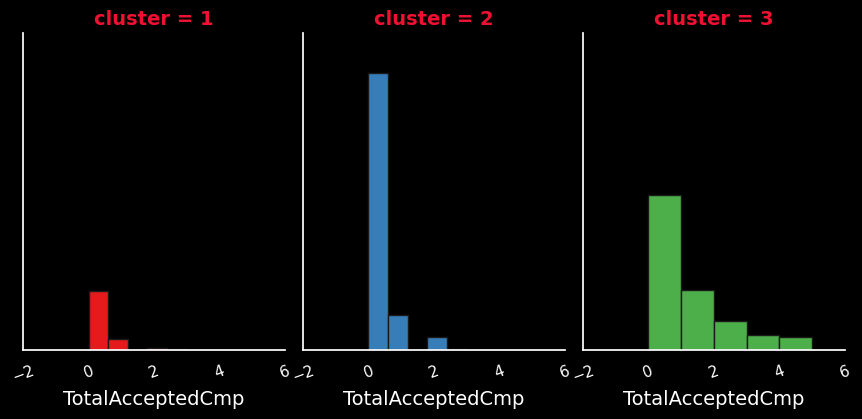

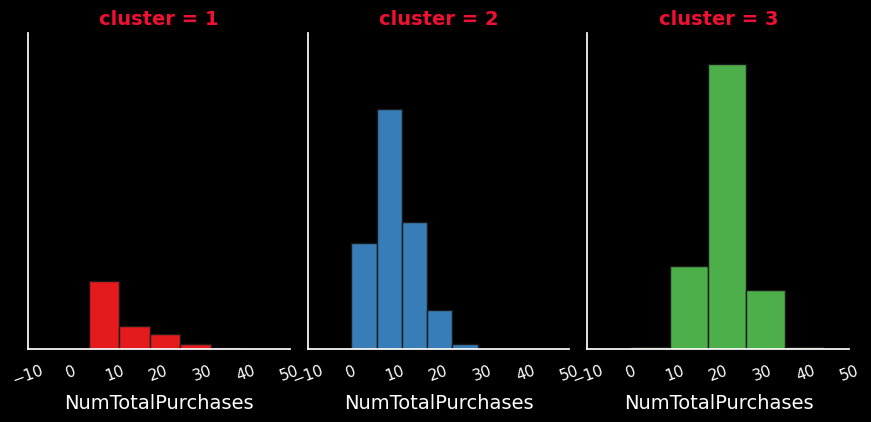

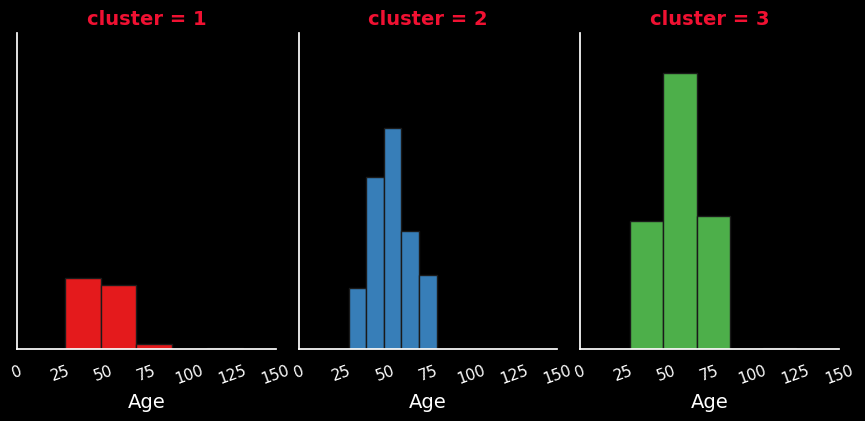

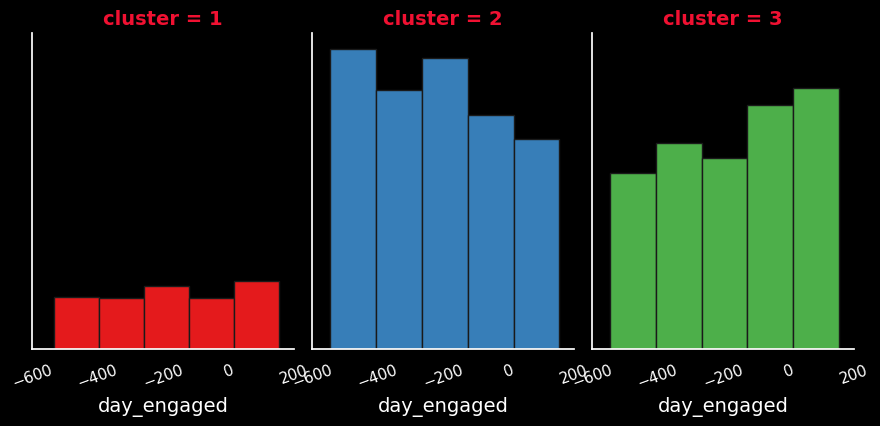

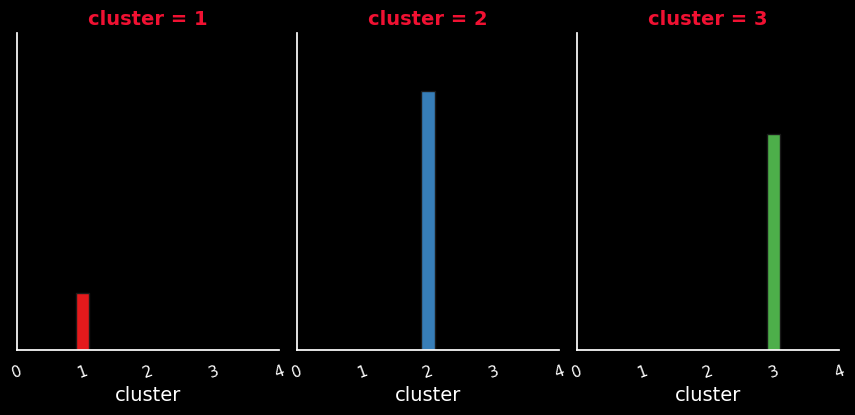

In [55]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=5, ec="k")
    diag.set_xticklabels(rotation=20, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=14, color = 'white')
    diag.set_titles(size=14, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(5)

Based on above information we can divide customer into 3 parts:-

1.Least Active Customer :- These customers belong to cluster third.

2.Highly Active Customer :- These customers belong to cluster one.

3.Moderately Active Customer :- These customers belong to cluster two.


Characteristics of Least Active Customer

*   In terms of Education : Least Active Customer are from UG backgroud
*   In terms of Marital_status : Number of people in relationship are approx. equal to single people
*   In terms of Income : Income of Least active customer are very less or say negligible.
*   In terms of Kids : Only few of these customer have child.
*   In terms of Expenses : Expenses of Least Active customer are very less or say negligible.
*   In terms of day_engaged : Least Active customer are not much enrolled with company for longer time.



Characteristics of Highly Active Customer

*   In terms of Education : Highly Active Customer are from PG background
*   In terms of Marital_status : Number of people in relationship are approx. two times of single people
*   In terms of Income : Income of Highly active customer are little less as compare to Moderately active customer.
*   In terms of Kids : Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).
*   In terms of Expenses : Expenses of Highly Active customer are less as compare to moderate.
*   In terms of Age : Age of these customer are between 25 to 75.
Maximum customer age are between 40 to 50.
*   In terms of day_engaged : Highly Active customer are more loyal as they engaged with company for longer period of time.






Characteristics of Moderately Active Customer
*   In terms of Education : Moderately Active Customer are also from PG backgroud
*   In terms of Marital_status : Number of people in relationship are slightly more as compare to single people
*   In terms of Income : Income of Moderately active customer are higher as compare to other customer.
*   In terms of Kids : Moderately active customer have less number of childern as compare to highly active customer.
*   In terms of Expenses : Expenses of Moderately Active customer are more as compare to Active.
*   In terms of Age : Age of these customer are between 25 to 75.
Maximum customer age are between 35 to 60.
*   In terms of day_engaged :Moderately Active customer are slightly less engaged with company as compare to Highly Active Customer.

